# Clustering & class reduction

In [1]:
'''Imports...'''

import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, leaders, fcluster
from io import StringIO
import requests
import json
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from matplotlib import pylab
np.random.seed(10) 

%matplotlib inline

In [2]:
'''import of data'''
def put_object_storage_file_with_credentials_a860223228054eadb78455bad5266913(container, filename):  
    
    f = open(filename,'r')
    file_data = f.read()
    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_c31eef4c6875a326d7c2cb16984a5e02d9dace51','domain': {'id': 'e4c3685617404e40b0afb0d280e5d678'},
            'password': 'b31qd?[3APH3&].5'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.put(url=url2, headers=headers2, data = file_data )
    print resp2

In [3]:
# The code was removed by DSX for sharing.

           Material  Usura_mat_g  Durezza_Disco  Comprex_LP  Comprex_LR  \
count    653.000000   653.000000     653.000000  653.000000  650.000000   
mean   20668.571210    13.232006     198.894334  175.343032  175.313846   
std     6272.771726     7.996596      25.954825   43.668705   44.198669   
min     8951.000000     5.600000     146.000000   37.000000   36.000000   
25%    15761.000000     8.600000     180.000000  147.000000  146.000000   
50%    23292.000000    11.000000     194.000000  173.000000  173.000000   
75%    25291.000000    14.700000     213.000000  198.000000  197.000000   
max    29526.000000   101.800000     305.000000  481.000000  489.000000   

        Grindo_LP   Grindo_LR  CodPinza_0  CodPinza_1  CodPinza_3  \
count  653.000000  653.000000  653.000000  653.000000  653.000000   
mean   208.984686  208.453292    0.269525    0.562021    0.018377   
std    328.141602  327.358947    0.444053    0.496519    0.134412   
min      0.000000    0.000000    0.000000    0.0

,Material,Usura_mat_g,Durezza_Disco,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,CodPinza_0,CodPinza_1,CodPinza_3,...,PistoneCpx_54,PistoneCpx_57,Inerzia_45.0,Inerzia_51.0,Inerzia_65.0,Inerzia_72.5,Raggio_medio_104.0,Raggio_medio_113.0,Raggio_medio_117.7,Raggio_medio_118.0
9482,9482,6.7,164,166,167,753,768,0,1,0,...,1,0,0,0,0,1,0,0,1,0
9799,9799,9.7,169,194,184,740,742,0,1,0,...,1,0,0,0,1,0,0,0,0,1
16136,16136,8.9,196,196,194,768,743,0,1,0,...,1,0,0,0,1,0,1,0,0,0
19269,19269,7.9,194,194,190,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
19269,19269,8.8,190,213,195,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [4]:

df_data_5 = pd.read_csv(get_object_storage_file_with_credentials_a860223228054eadb78455bad5266913('ITTProject', 'cleaned_materials.csv'), index_col = 'Unnamed: 0')
df_data_5.head()


,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
8951,0.042246,-0.005937,0.027117,-0.001903,0.013791,-0.022353,0.063907,-0.023371,0.004564,-0.012443,...,0.000227,0.000112,0.000044,0.000041,-0.000015,-7.860875e-07,-0.000057,-0.000066,0.000062,0.000020
8997,0.027176,0.087921,-0.077450,0.032441,0.005934,0.029765,0.009249,0.004650,-0.003320,0.016842,...,-0.008613,-0.012683,0.004724,0.008423,0.006751,-1.920840e-03,-0.006889,-0.004928,-0.010872,-0.005499
9024,0.042246,-0.005937,0.027117,-0.001903,0.013791,-0.022353,0.063907,-0.023371,0.004564,-0.012443,...,0.000227,0.000112,0.000044,0.000041,-0.000015,-7.860875e-07,-0.000057,-0.000066,0.000062,0.000020
9043,0.052750,0.002831,0.037146,-0.011094,0.035755,-0.066244,0.203717,-0.099144,0.056779,-0.056352,...,-0.004587,-0.000884,-0.000036,-0.000659,-0.000442,-4.274769e-04,0.000617,0.000255,-0.000725,0.002245
9313,0.042074,-0.005888,0.026843,-0.001879,0.013626,-0.022069,0.063027,-0.023009,0.004487,-0.012187,...,-0.001677,-0.000871,-0.000362,-0.000424,0.000138,2.836292e-06,0.000862,0.001160,-0.001382,-0.000705


In [5]:
'''merge of the two dataset'''
df_merged = df_data_2.join(df_data_5, how = 'right')
df_merged = df_merged.reset_index(drop=True)
for col in df_merged.columns:
    if df_merged[col].dtype != 'object':
        df_merged[col] = df_merged[col].fillna(df_merged[col].median())
    else:
        df_merged[col] = df_merged[col].apply(lambda x : x.lower())
        df_merged[col] = df_merged[col].fillna(df_merged[col].mode())
print df_merged.shape
df_merged.head()

(651, 243)


,Material,Usura_mat_g,Durezza_Disco,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,CodPinza_0,CodPinza_1,CodPinza_3,...,183,184,185,186,187,188,189,190,191,192
0,8951,15.2,165,182,182,810,813,0,1,0,...,0.000227,0.000112,0.000044,0.000041,-0.000015,-7.860875e-07,-0.000057,-0.000066,0.000062,0.000020
1,8997,13.3,177,181,203,738,729,0,1,0,...,-0.008613,-0.012683,0.004724,0.008423,0.006751,-1.920840e-03,-0.006889,-0.004928,-0.010872,-0.005499
2,9024,7.5,235,125,136,727,731,0,1,0,...,0.000227,0.000112,0.000044,0.000041,-0.000015,-7.860875e-07,-0.000057,-0.000066,0.000062,0.000020
3,9024,7.8,237,137,102,701,674,0,1,0,...,0.000227,0.000112,0.000044,0.000041,-0.000015,-7.860875e-07,-0.000057,-0.000066,0.000062,0.000020
4,9043,10.9,180,196,201,820,805,0,1,0,...,-0.004587,-0.000884,-0.000036,-0.000659,-0.000442,-4.274769e-04,0.000617,0.000255,-0.000725,0.002245


df_merged['Disco'] = df_merged['Disco'].apply(lambda x : x.lower())
#disco_dict = { '280x22' : 5.4 , '256x22' : 4.5, '276x24' : 5.7}
#df_merged['Disco'] =  df_merged['Disco'].apply(lambda x : disco_dict[x])

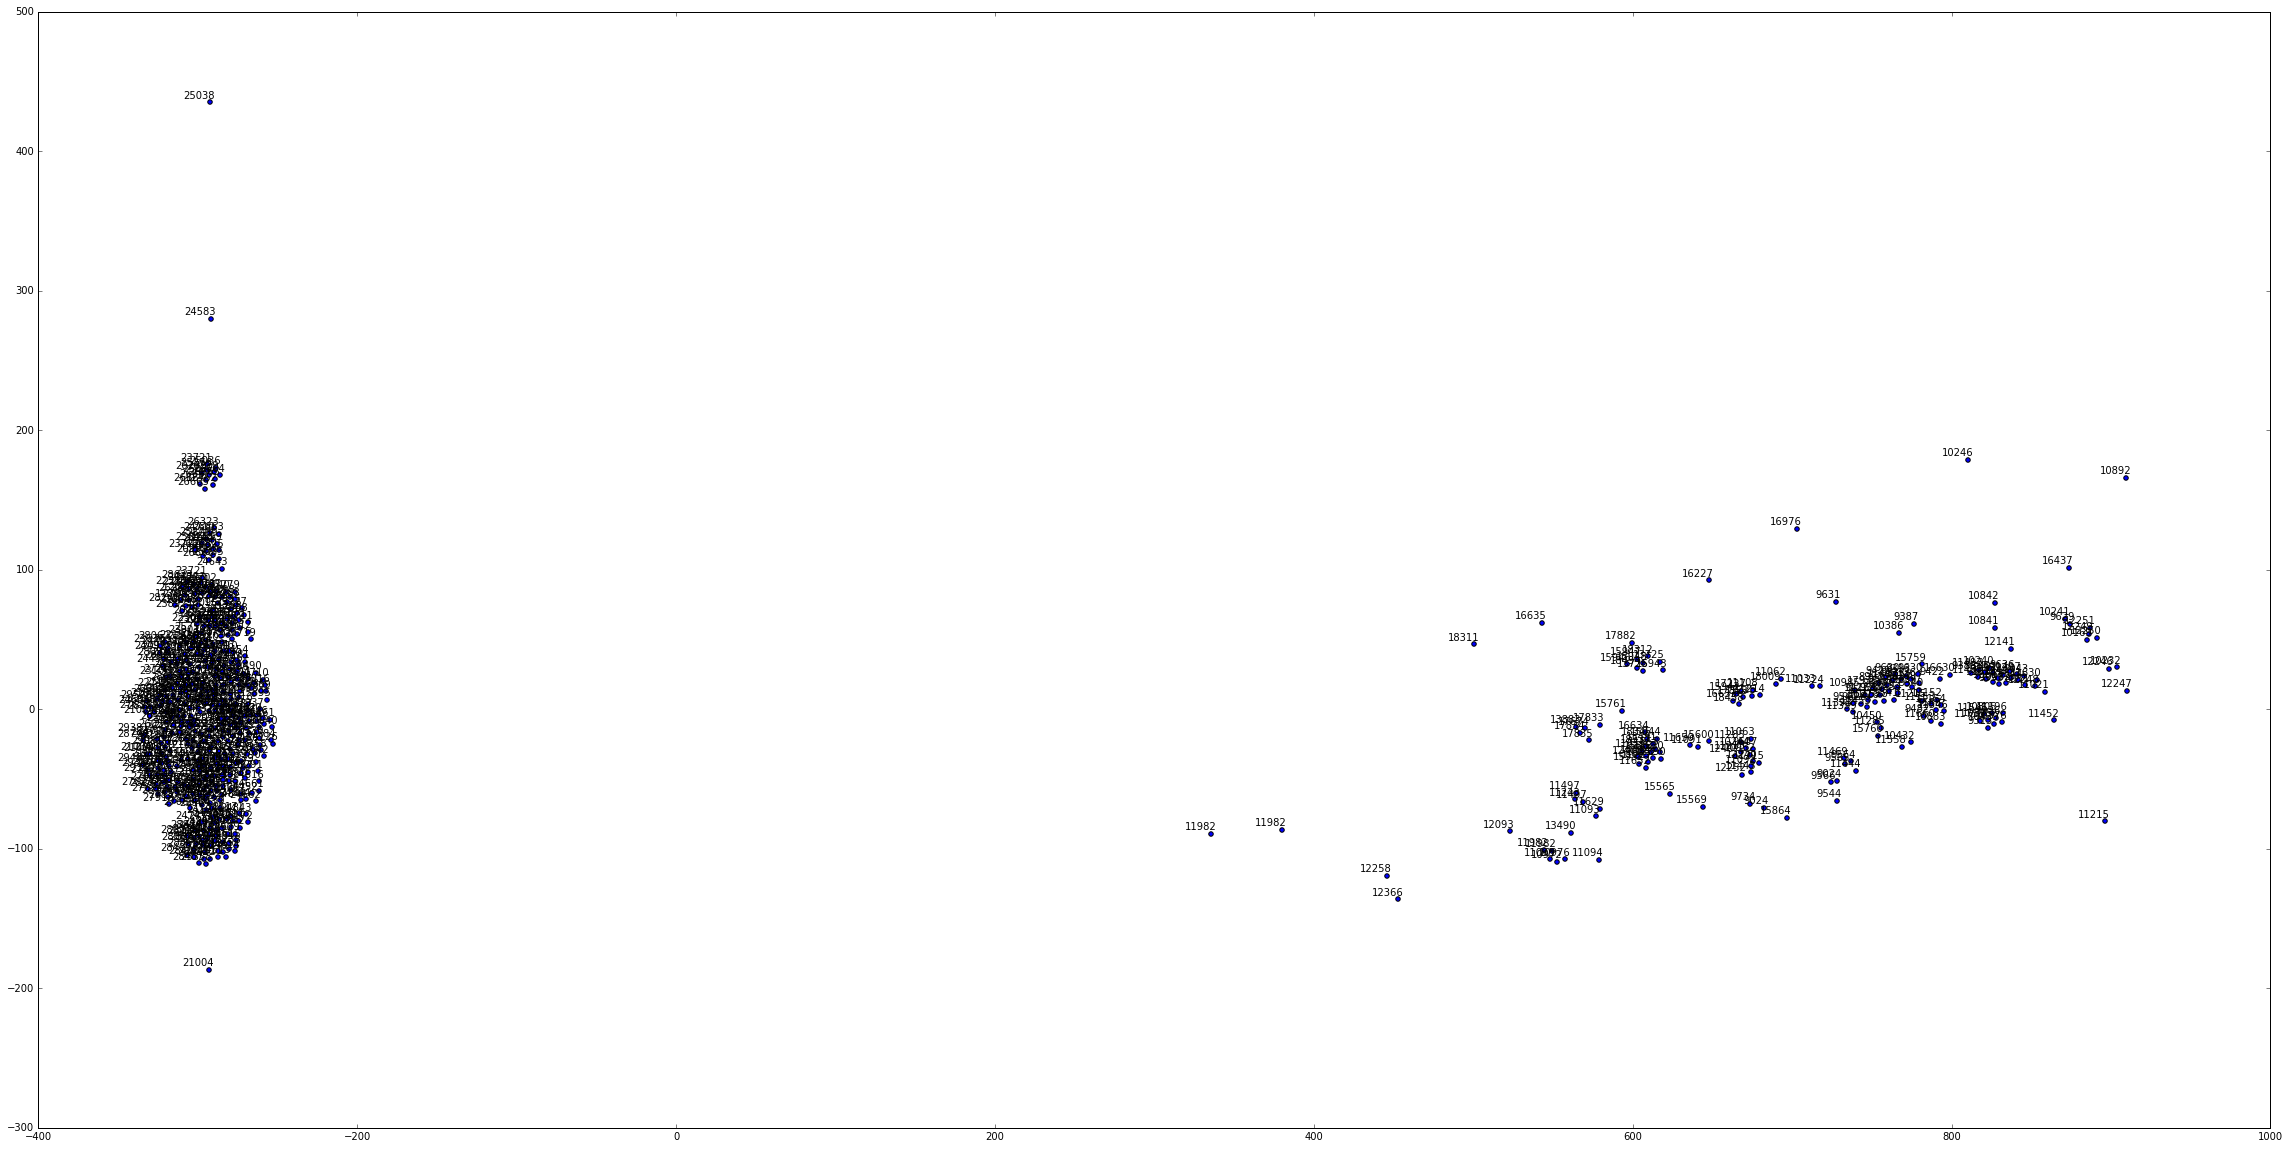

In [6]:
'''function for plotting the data points into a 2D space'''
def plot_tsne(embeddings, labels, reduced):
    assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
    pylab.figure(figsize=(40,20)) # in inches
    dim_lab = len(set(labels))
    if reduced== True:
        color = ['b', 'g','r', 'c', 'm', 'y', 'k', 'w']
    for i, label in enumerate(labels):
        x, y = embeddings[i,:]
        if reduced == True:
            pylab.scatter(x, y, c= color[int(label)])
        else:
             pylab.scatter(x, y)
        pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    pylab.show()

tsne= TSNE(perplexity=30, n_components= 2, init='pca', n_iter= 5000)
transf_tsne = tsne.fit_transform(df_merged.drop('Material', axis=1).values)
labels = df_merged['Material'].values
plot_tsne(transf_tsne, labels, False)

In [7]:
X = df_merged.drop('Material', axis=1).values
print X.shape

(651, 242)


In [8]:
Z = linkage(X, 'ward')
print Z.shape

(650, 4)


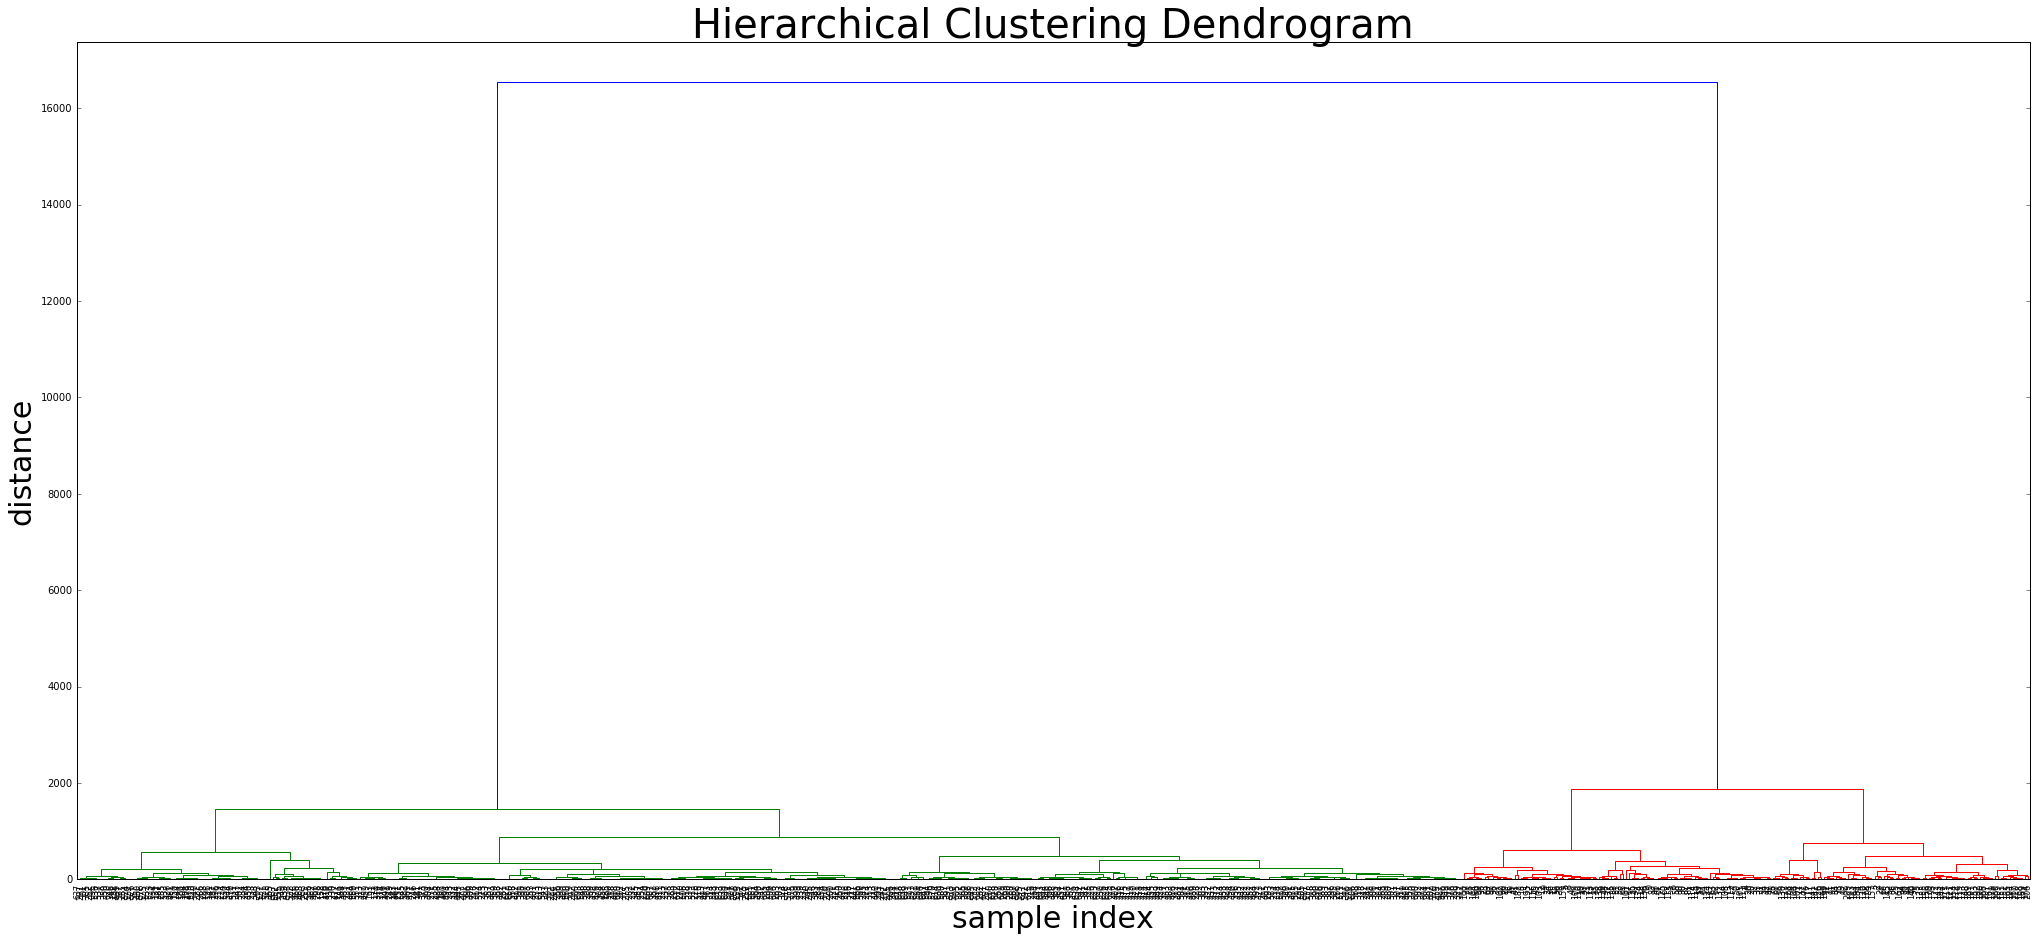

In [9]:
'''calculate full dendrogram'''
plt.figure(figsize=(35, 15))
plt.title('Hierarchical Clustering Dendrogram',fontsize = 40)
plt.xlabel('sample index', fontsize = 30)
plt.ylabel('distance', fontsize = 30)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

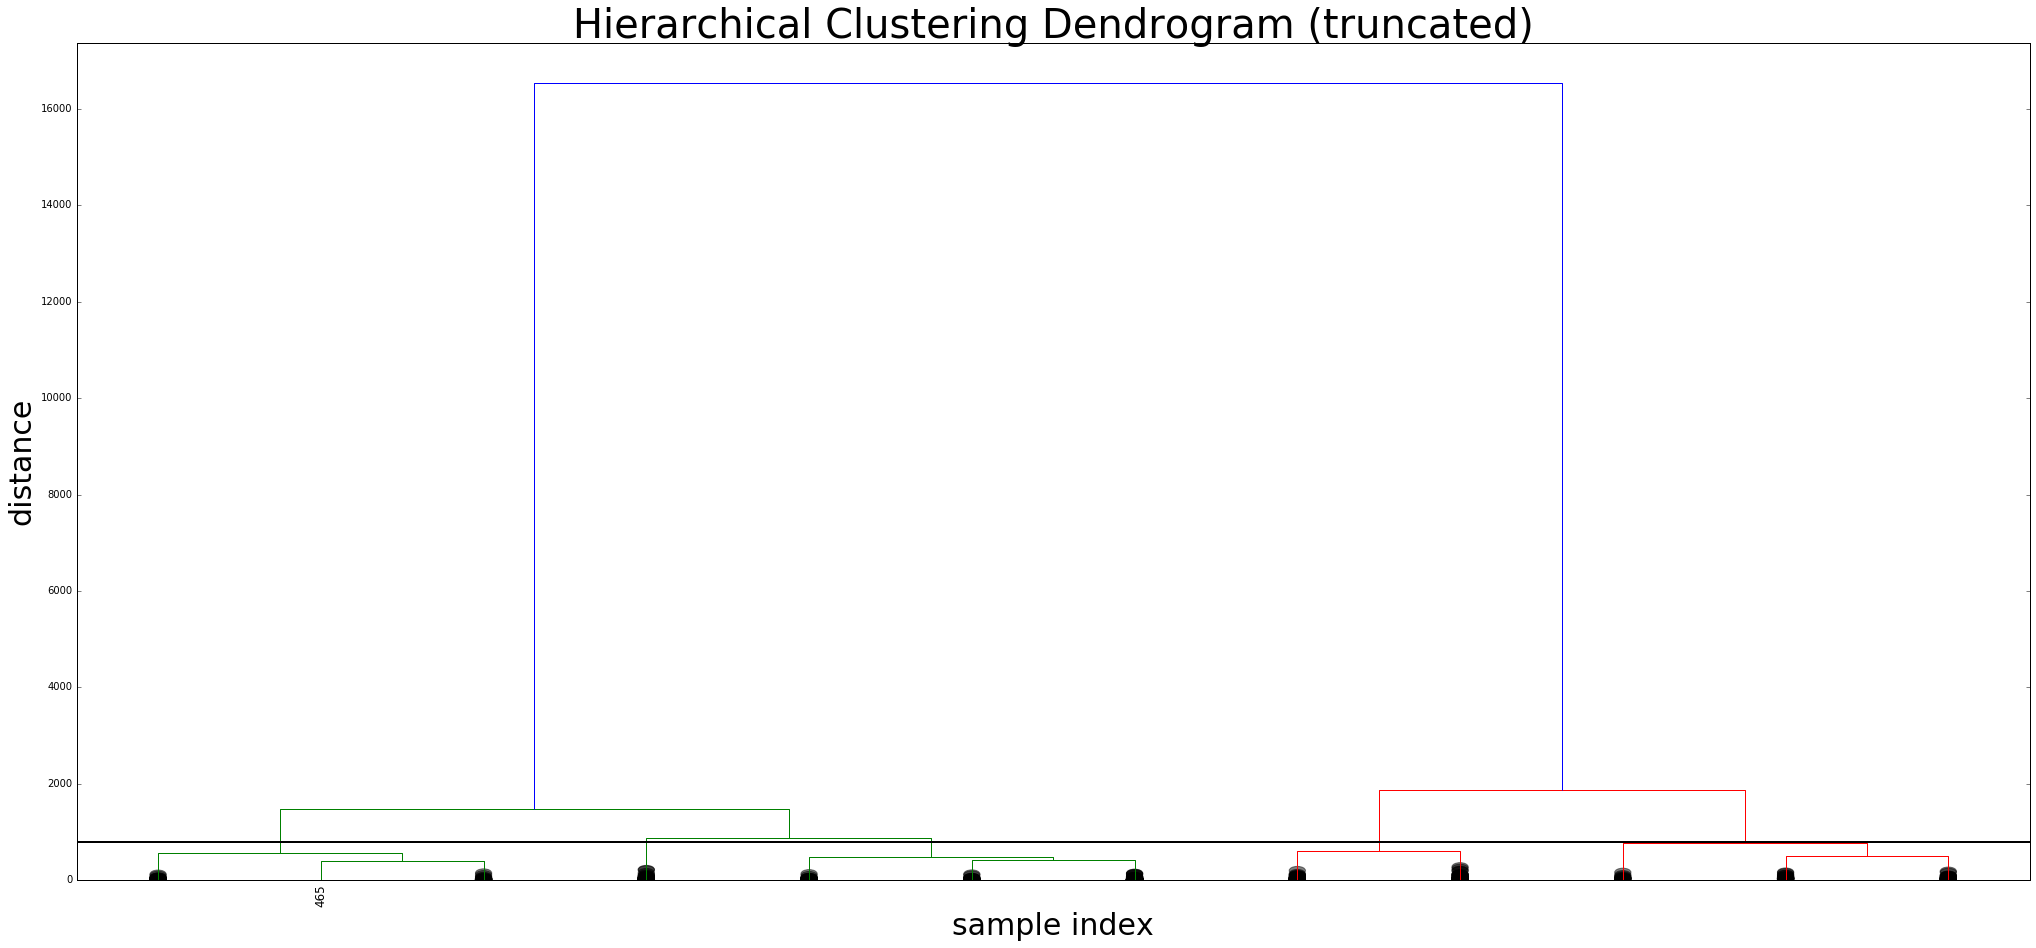

In [10]:
'''cut the dendrogram at a given level'''
cut = 800
plt.figure(figsize=(35, 15))
plt.title('Hierarchical Clustering Dendrogram (truncated)', fontsize = 40)
plt.xlabel('sample index', fontsize = 30)
plt.ylabel('distance', fontsize = 30)
plt.plot(np.linspace(0, X.shape[0], 5000), cut*np.ones(5000), '-', c = 'black', linewidth = 2)
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,# to get a distribution impression in truncated branche
)

plt.show()

In [11]:
'''effectively cutting the dendrogram'''
T = fcluster(Z , t = cut, criterion = 'distance')
roots = leaders(Z, T)

## KMEANS Clustering

In [12]:
'''set num of clusters in order to perform the Kmeans algorithm'''
n_clusters = len(set(T))
print n_clusters
clust_kmeans = KMeans(n_clusters = n_clusters, max_iter = 700, tol = 0.00000001, n_init = 500).fit(X)

5


In [13]:
clust_kmeans.cluster_centers_.shape

(5, 242)

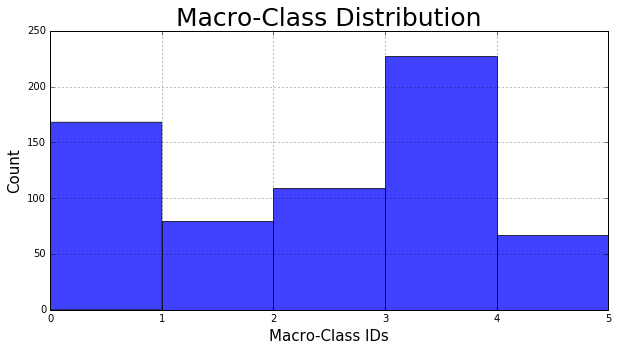

In [14]:
'''Plotting the new macro-class frequencies'''

class_distr = clust_kmeans.labels_

plt.figure(figsize=(10, 5))
plt.hist(class_distr, np.arange(n_clusters+1), facecolor='blue', alpha=0.75)
plt.title('Macro-Class Distribution', fontsize=25)
plt.xlabel('Macro-Class IDs', fontsize=15)
plt.ylabel('Count', fontsize=15)
#plt.xlim(0, n_clusters-1)
plt.grid(True)

plt.show()

In [15]:
'''Transforming the dataset's labels into the new created ones'''

class_mappings = {int(df_merged['Material'].values[idx]) :
                     class_distr[idx] 
                  for idx in np.arange(class_distr.shape[0])}

## Visualization of the new Clusters

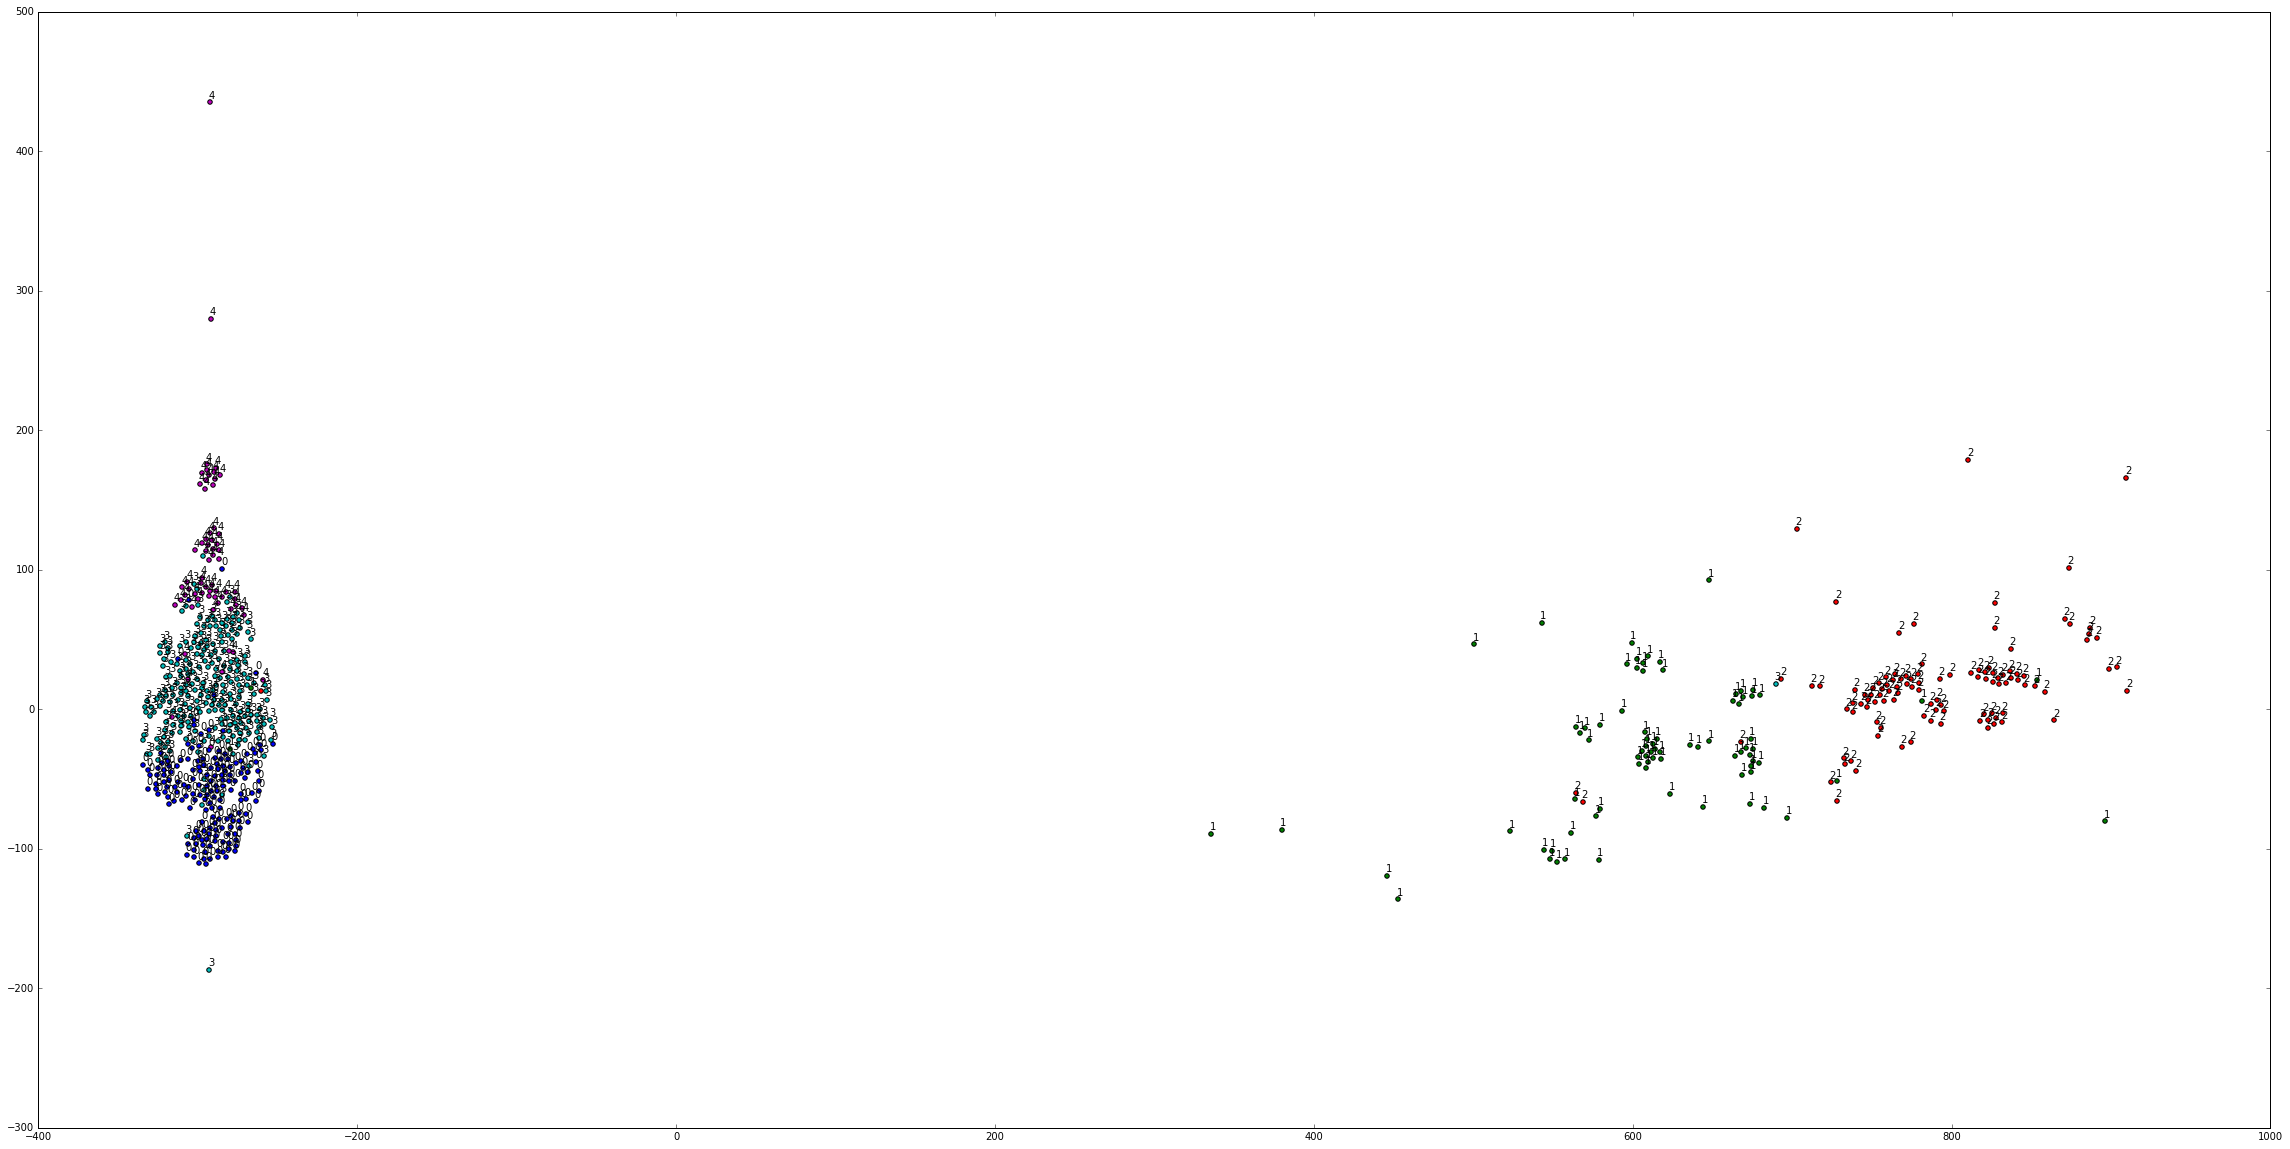

In [16]:
'''Plot of the new clusters obtained from Kmeans unsing ALL the features (both from Prove e Materiali)'''

transf_tsne_new = tsne.fit_transform(df_merged.drop('Material', axis = 1 ).values)
labels_new = pd.Series(df_merged['Material'].values).apply(lambda x : class_mappings[int(x)]).values
plot_tsne(transf_tsne_new, labels_new, True)

## Preparing Dataset for Classification task && more Visualization

In [17]:
'''Here all the feature regarding materials are dropped'''

df_merged['Material'] = df_merged['Material'].apply(lambda x : class_mappings[x])
df_merged = df_merged.drop([str(i) for i in np.arange(0,193)], axis = 1)
print df_merged.shape
print df_merged['Material'].unique()
df_merged.head()

(651, 50)
[2 1 4 3 0]


,Material,Usura_mat_g,Durezza_Disco,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,CodPinza_0,CodPinza_1,CodPinza_3,...,PistoneCpx_54,PistoneCpx_57,Inerzia_45.0,Inerzia_51.0,Inerzia_65.0,Inerzia_72.5,Raggio_medio_104.0,Raggio_medio_113.0,Raggio_medio_117.7,Raggio_medio_118.0
0,2,15.2,165,182,182,810,813,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,2,13.3,177,181,203,738,729,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,1,7.5,235,125,136,727,731,0,1,0,...,1,0,0,0,1,0,0,0,0,1
3,1,7.8,237,137,102,701,674,0,1,0,...,1,0,0,0,1,0,0,0,0,1
4,2,10.9,180,196,201,820,805,0,1,0,...,1,0,0,0,1,0,0,0,0,1


In [18]:
'''Checking all the new data's shape '''

print df_merged.shape

(651, 50)


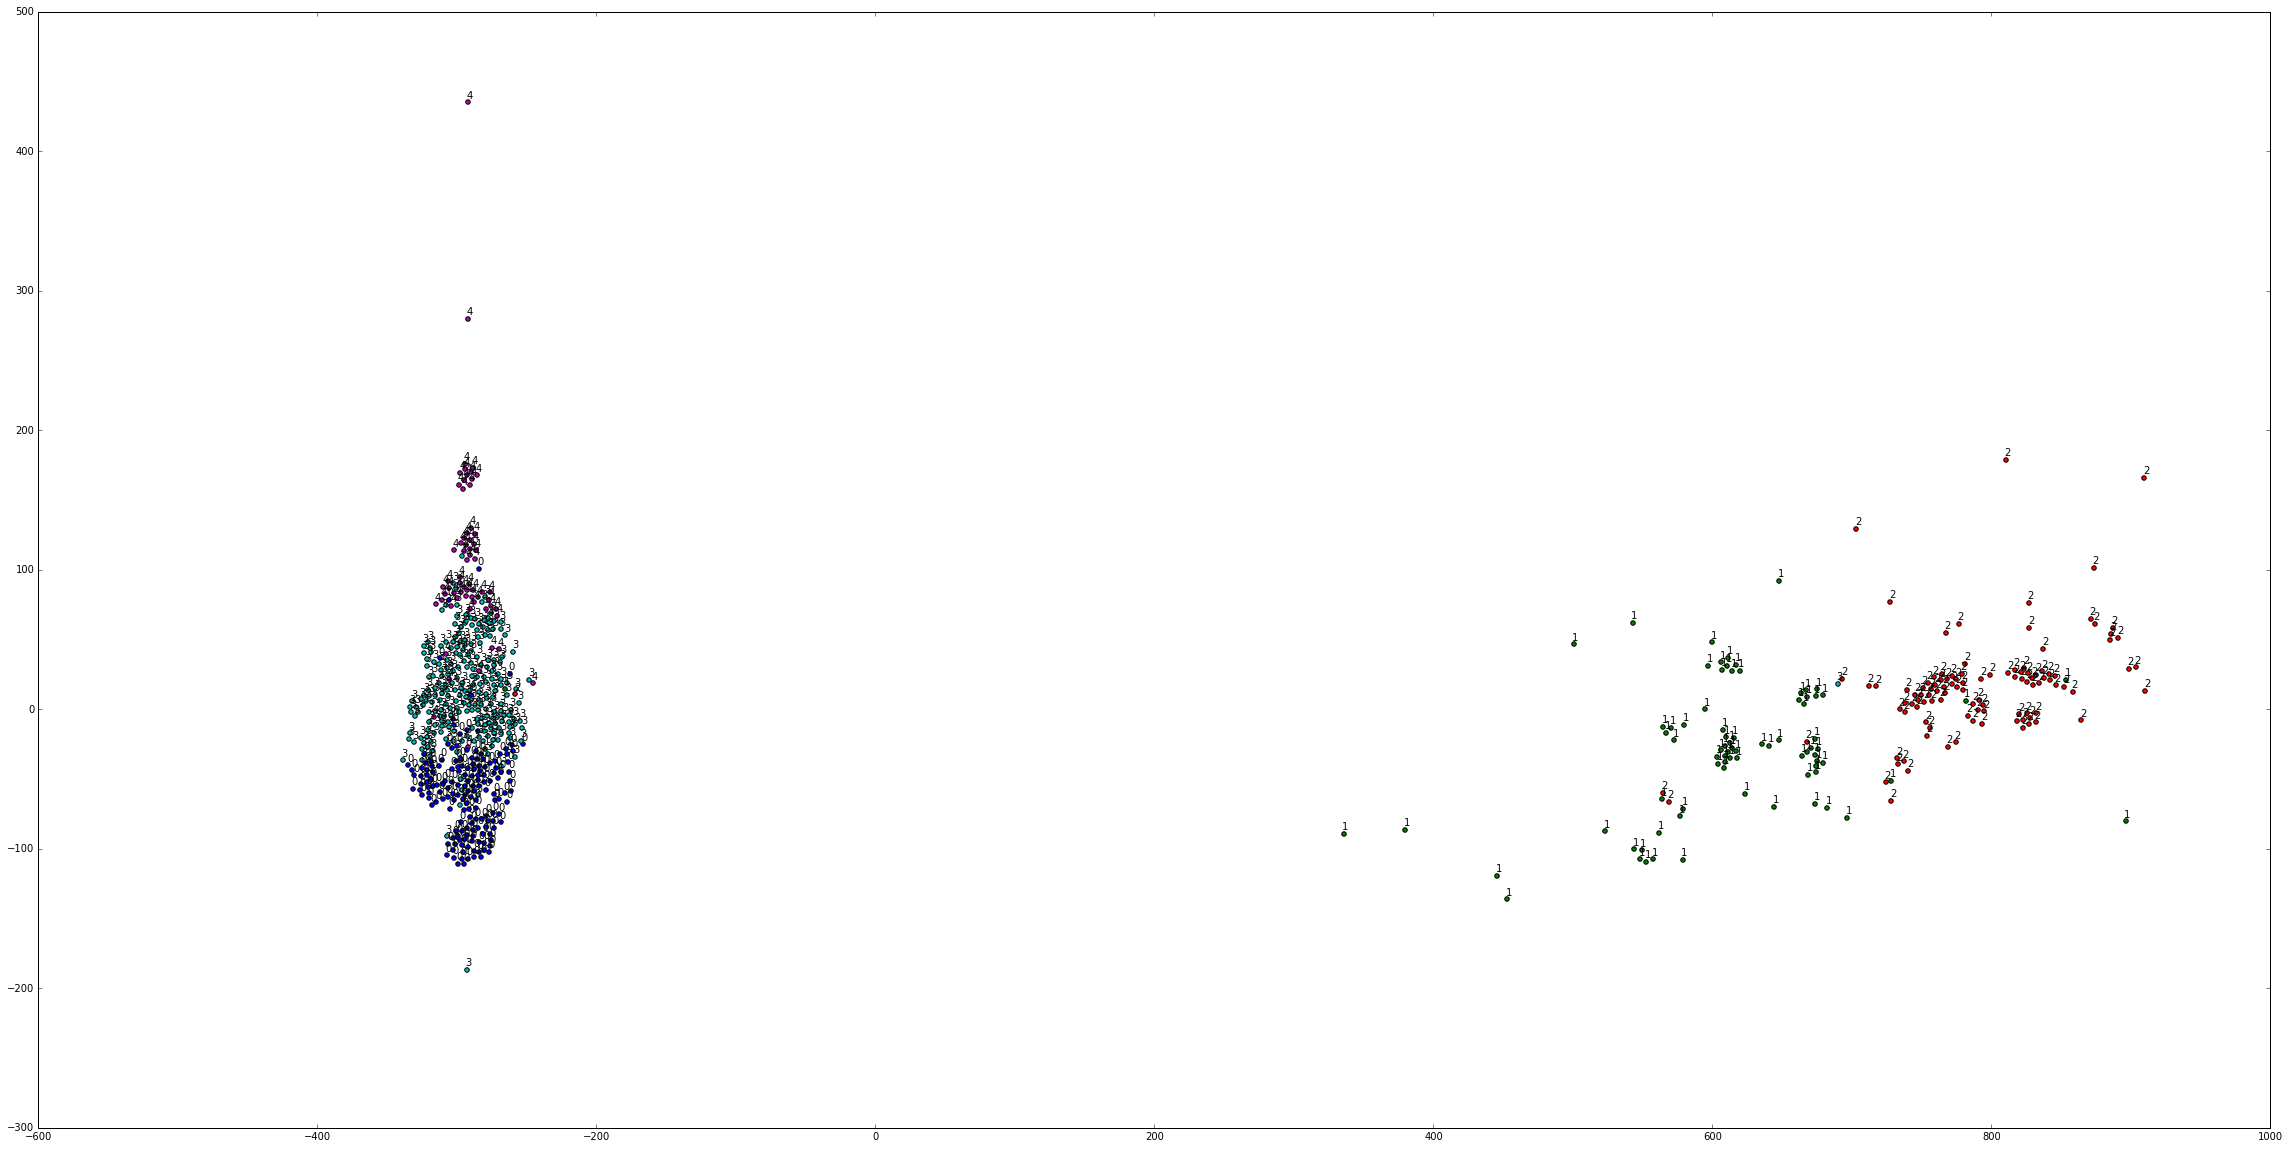

In [19]:
''' Visualization of the cluster WITHOUT the features about the material (miscela & materia prima)'''

transf_tsne_new = tsne.fit_transform(df_merged.drop('Material', axis = 1).values)
labels_new = df_merged['Material'].values
plot_tsne(transf_tsne_new, labels_new, True)

import csv
with open('mapping.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(class_mappings.iteritems())

put_object_storage_file_with_credentials_a860223228054eadb78455bad5266913('ITTProject', 'mapping.csv')

df_merged.to_csv('clustered_merged.csv', index=True)
put_object_storage_file_with_credentials_a860223228054eadb78455bad5266913('ITTProject', 'clustered_merged.csv')